# Chap 16 - Ex3: apply PCA for Skin_NonSkin.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [4]:
skin = pd.read_csv('Data/Skin_NonSkin.txt', sep = '\t', header = None)
skin.columns = [f'Feature_{i+1}' for i in range(skin.shape[1])]
skin

,Feature_1,Feature_2,Feature_3,Feature_4
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
...,...,...,...,...
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2


In [5]:
skin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Feature_1  245057 non-null  int64
 1   Feature_2  245057 non-null  int64
 2   Feature_3  245057 non-null  int64
 3   Feature_4  245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


Number of numerical fields: 3

All numerical fields: Index(['Feature_1', 'Feature_2', 'Feature_3'], dtype='object')



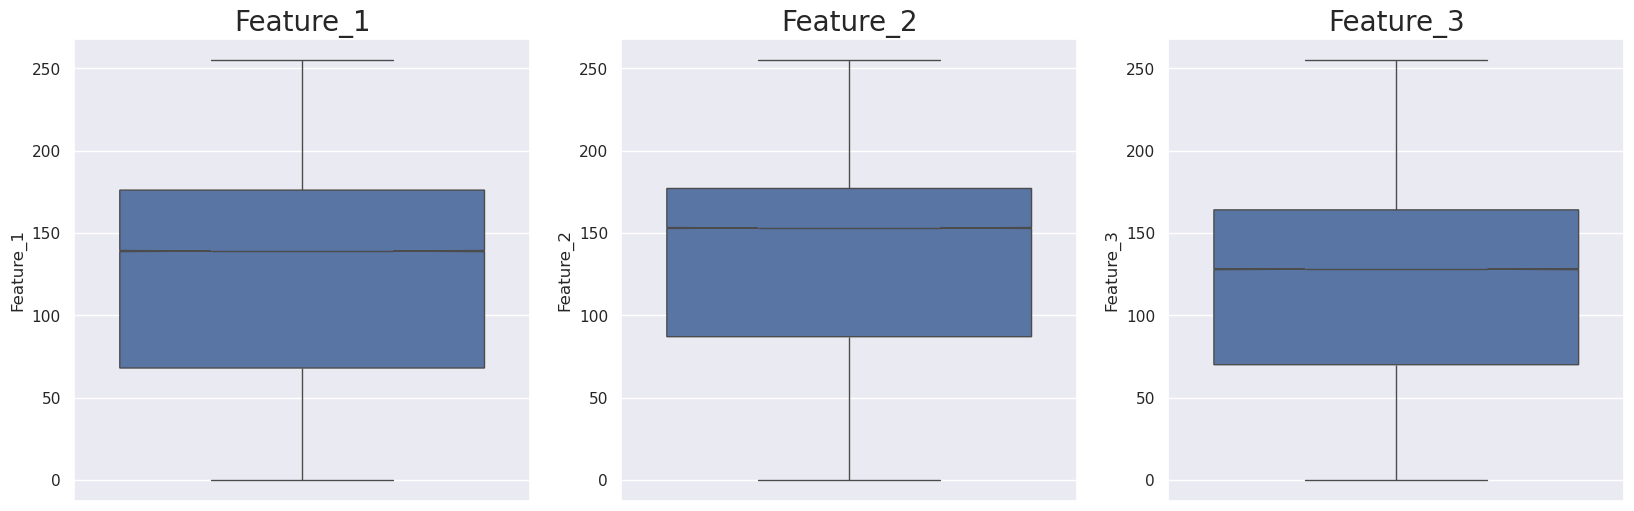

In [10]:
## Visualize numerical variables

sbn.set_theme(style='darkgrid')

numeric_cols = skin.columns[:-1]

col = 3
row = (len(numeric_cols)//col) if ( (len(numeric_cols)%col) == 0) else ((len(numeric_cols)//col) + 1)

print(f'Number of numerical fields: {len(numeric_cols)}\n')
print(f'All numerical fields: {numeric_cols}\n')

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
for i in range(1, len(numeric_cols)+1):
    try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = skin, y = numeric_cols[i-1], notch = True)
        plt.title(numeric_cols[i-1], size = 20)
    except Exception:
        print('Error {}'.format(numeric_cols[i-1]))
        break
plt.show()

## <span style = 'color:yellow'> Apply PCA for Skin_NonSkin data with MinMaxScaler (no outliers)

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline


pca_pipe = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),
    ('PCA', PCA(0.9))
])

pca_pipe.fit(skin)

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('PCA', PCA(n_components=0.9))])

In [12]:
skin_pca = pd.DataFrame(
    pca_pipe.transform(skin),
    columns = [f'PC{i+1}' for i in range(pca_pipe.named_steps['PCA'].n_components_)]
)

skin_pca

,PC1,PC2
0,-0.546334,-0.615474
1,-0.542614,-0.621142
2,-0.538893,-0.626810
3,-0.531452,-0.638146
4,-0.531452,-0.638146
...,...,...
245052,0.133922,0.244294
245053,0.133922,0.244294
245054,0.133922,0.244294
245055,0.133922,0.244294


In [13]:
print('Explained Variance Raito:\n',pca_pipe.named_steps['PCA'].explained_variance_ratio_)

Explained Variance Raito:
 [0.58456675 0.34738956]


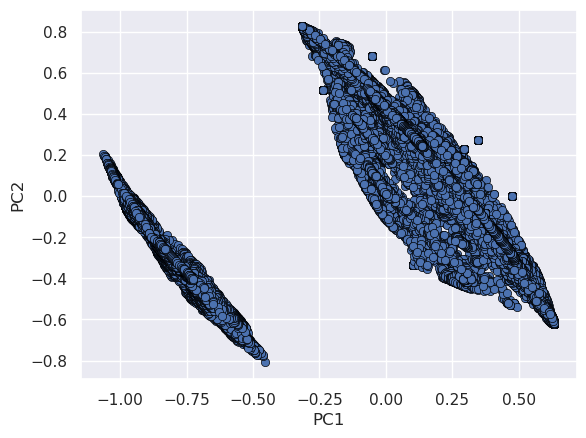

In [14]:
sbn.scatterplot(data = skin_pca, x = 'PC1', y = 'PC2', edgecolors = 'black')
plt.show()